In [1]:
import compiam
import numpy as np
import matplotlib.pyplot as plt
import mirdata

### Load dataset

In [4]:
data_home = 'dataset'
dataset_name = 'compmusic_raga'

In [6]:
dataset = mirdata.initialize(dataset_name, data_home=data_home)

In [7]:
dataset.download()

3.36GB [21:10, 2.84MB/s]                                                                                                                                                                    
800kB [00:00, 917kB/s]                                                                                                                                                                      


In [ ]:
#dataset.validate()

### Pick and example track

In [145]:
example_track = dataset.choice_track()

while example_track.tradition != 'carnatic':
    example_track = dataset.choice_track()

### Get pitch track

In [146]:
pitch = example_track.pitch_post_processed

In [147]:
times = example_pitch.times
frequencies = example_pitch.frequencies

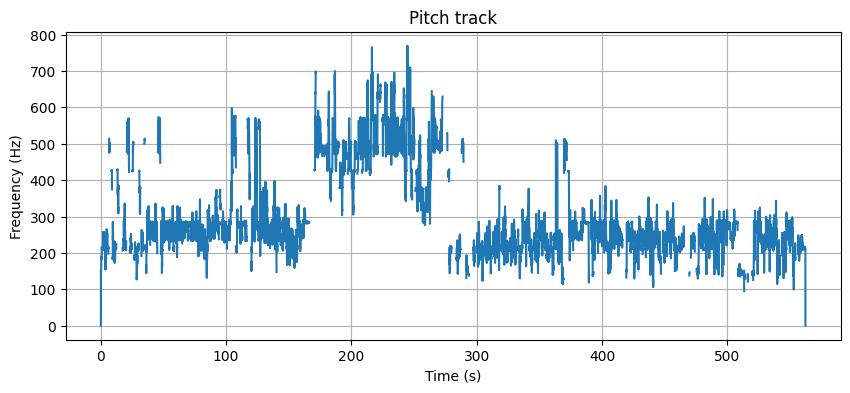

In [148]:
plot_frequencies = frequencies.copy()
plot_frequencies[plot_frequencies == 0] = np.nan

plt.figure(figsize=(10, 4))
plt.plot(times, plot_frequencies)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Pitch track')
plt.grid()
plt.show()

### Process pitch track

In [149]:
frequencies = frequencies[frequencies != 0]

In [150]:
frequencies = frequencies[(frequencies > tonic / 2) & (frequencies < tonic * 4)]

In [151]:
tonic = example_track.tonic_fine_tuned

In [152]:
srutis = 22 * np.log2(frequencies / tonic)

### Compute and plot pitch histogram

In [153]:
hist, bin_edges = np.histogram(srutis, bins=100)
hist = hist / np.max(hist)

In [154]:
ragam = example_track.raga

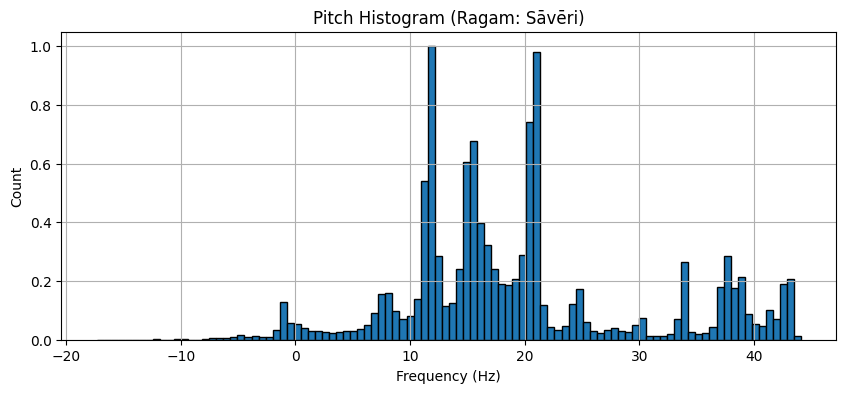

In [155]:
plt.figure(figsize=(10, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title(f'Pitch Histogram (Ragam: {ragam})')
plt.grid(True)
plt.show()

In [156]:
hist.shape

(100,)